In [2]:
import pandas as pd

In [19]:
df = pd.read_csv('diabetes.csv').iloc[:,1:]
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


In [20]:
df.shape

(253680, 22)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0
Veggies,253680.0,0.811420,0.391175,0.0,1.0,1.0,1.0,1.0


In [28]:
binary_vars = [col for col in df.columns if df[col].nunique() == 2]
numerical_vars = [col for col in df.columns if col not in binary_vars]

len(numerical_vars), len(binary_vars)

(7, 15)

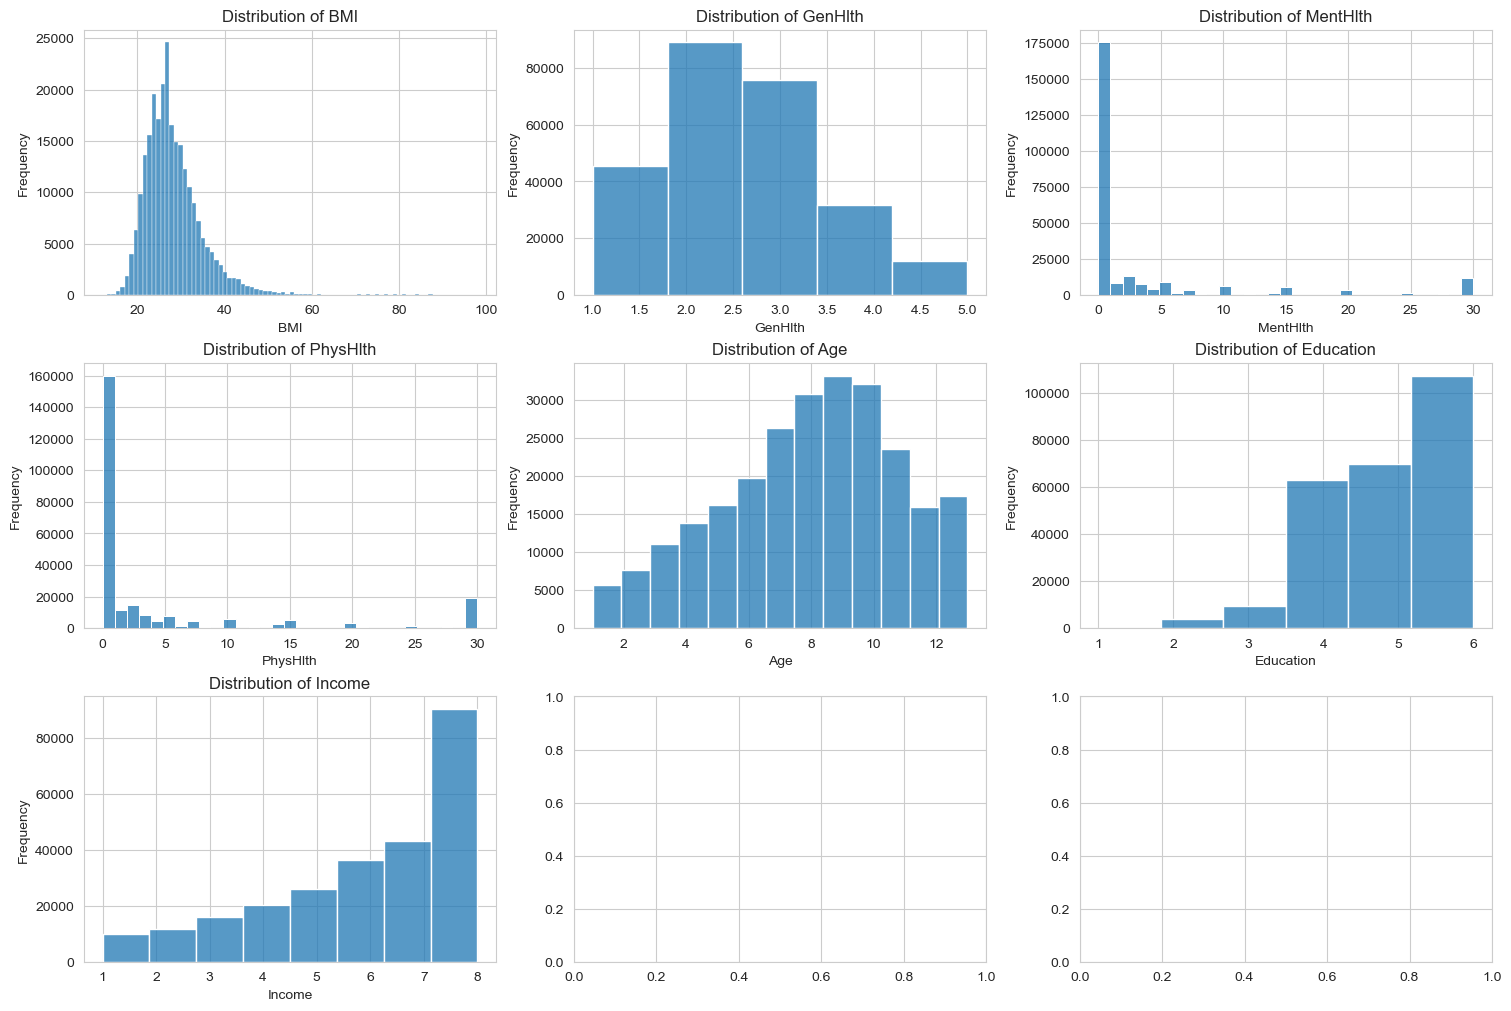

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), constrained_layout=True)

axes = axes.flatten()

# Plot histograms for numerical columns
for ax, col in zip(axes, numerical_vars):
    sns.histplot(df[col], bins=df[col].nunique(), ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.show()


# sns.histplot(diabetes_data['MentHlth'], bins=30, kde=True, ax=axes[0, 1]) (30 if df[col].nunique() > 10 else df[col].nunique())
# axes[0, 1].set_title('Distribution of Mental Health Days')

# sns.histplot(diabetes_data['PhysHlth'], bins=30, kde=True, ax=axes[1, 0])
# axes[1, 0].set_title('Distribution of Physical Health Days')

# sns.histplot(diabetes_data['Age'], bins=13, kde=False, ax=axes[1, 1])
# axes[1, 1].set_title('Distribution of Age Categories')


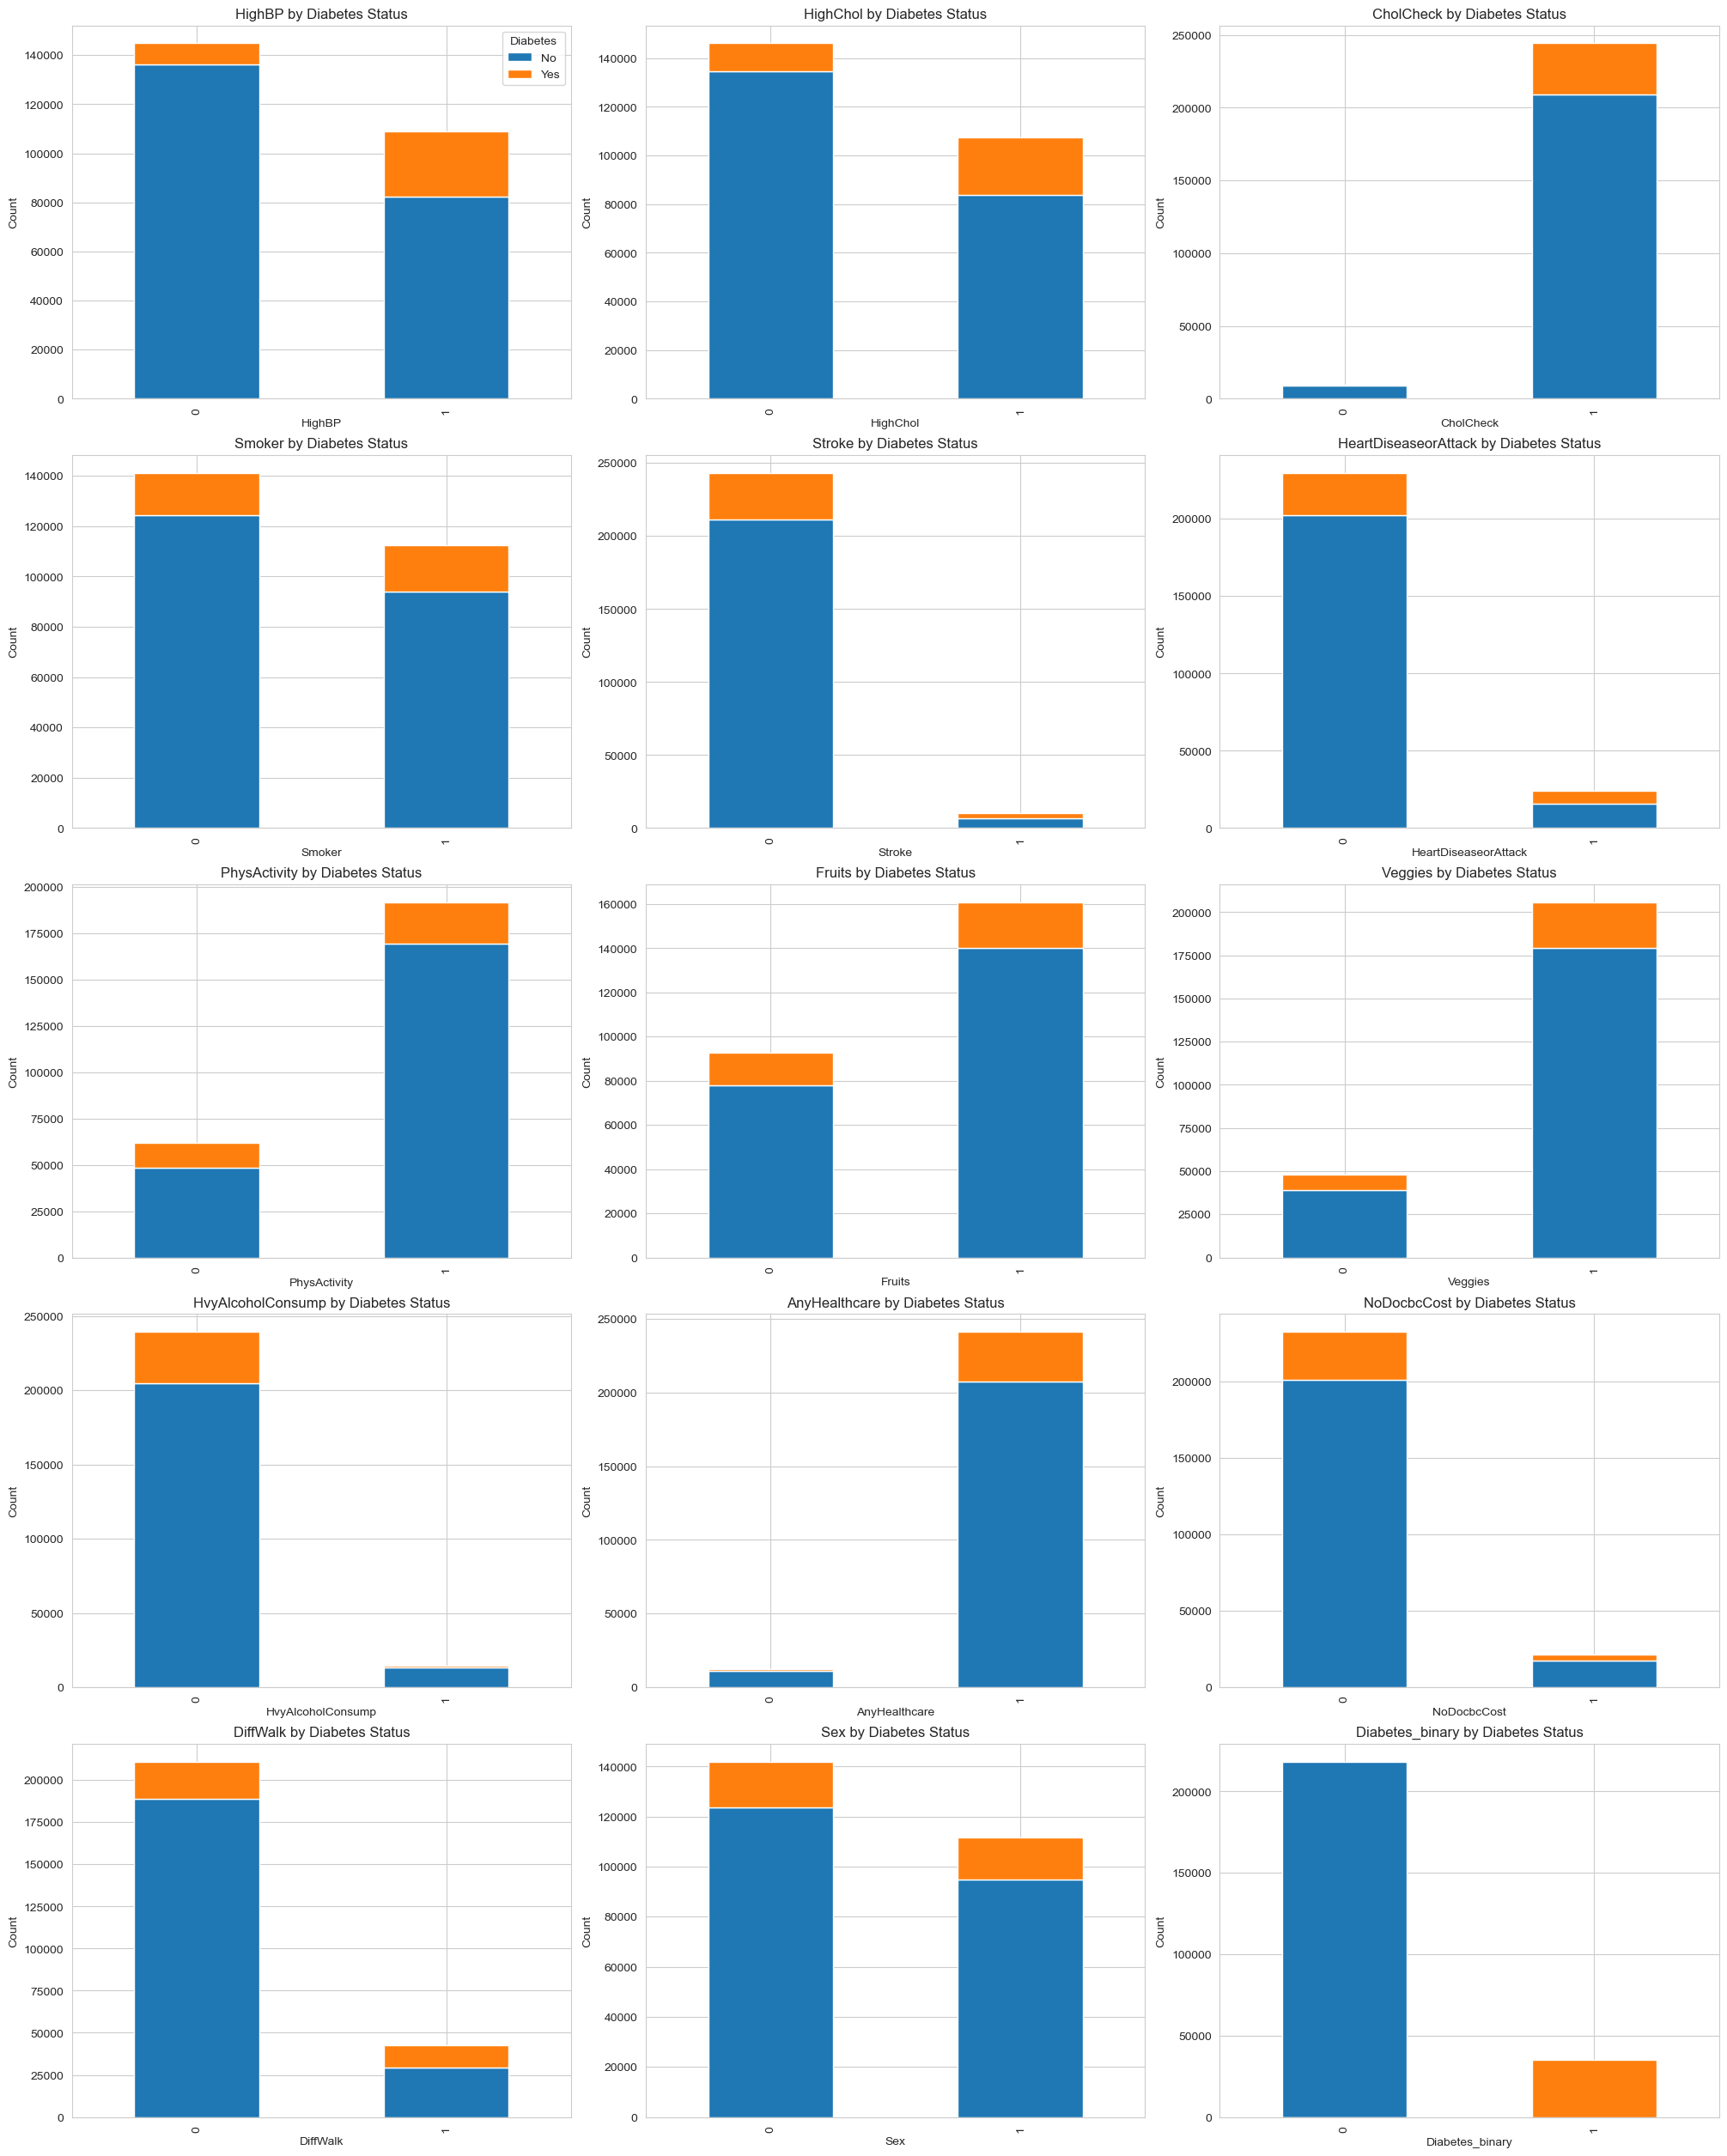

In [38]:
# Calculate the number of rows needed for the grid of binary variables
n_binary_vars = len(binary_vars)
n_cols = 3  # Number of columns in the grid
n_rows = (n_binary_vars + n_cols - 1) // n_cols  # Calculate rows needed

# Setting up the grid for stacked bar charts
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  # Flatten the array to iterate easily

# Generate stacked bar charts for each binary variable
for ax, var in zip(axes, binary_vars):
    pd.crosstab(df[var], df['Diabetes_binary']).plot(kind='bar', stacked=True, ax=ax, legend=None)
    ax.set_title(f'{var} by Diabetes Status')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')

# Remove unused axes
for i in range(len(binary_vars), len(axes)):
    fig.delaxes(axes[i])

# Add legend to the last plot
axes[0].legend(title='Diabetes', labels=['No', 'Yes'])
plt.show()